In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/ML_Project/Datasets/KickStarter/ks-projects.csv',encoding='latin1')

In [ ]:
dataset

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [ ]:
print(dataset.columns.tolist())

['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


In [ ]:
print(dataset.columns.tolist())
dataset=dataset.drop(columns=['ID',"name",'category','deadline','launched'])
print(dataset.columns.tolist())

['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']
['main_category', 'currency', 'goal', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


In [ ]:
print(dataset.columns.tolist())

['main_category', 'currency', 'goal', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


In [ ]:
dataset

,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95
1,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,220.0,45000.00
3,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00
4,Film & Video,USD,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...
378656,Film & Video,USD,50000.0,25.0,canceled,1,US,25.0,25.0,50000.00
378657,Film & Video,USD,1500.0,155.0,failed,5,US,155.0,155.0,1500.00
378658,Film & Video,USD,15000.0,20.0,failed,1,US,20.0,20.0,15000.00
378659,Technology,USD,15000.0,200.0,failed,6,US,200.0,200.0,15000.00


In [ ]:
# Removing Undefined

dataset=dataset[dataset['state']!='undefined']

In [ ]:
# Number of samples per State
dataset['state'].value_counts()

,count
state,
failed,197719
successful,133956
canceled,38779
live,2799
suspended,1846


#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

CategoryEncoder=LabelEncoder()
StateEncoder=LabelEncoder()
CurrencyEncoder=LabelEncoder()
CountryEncoder=LabelEncoder()

dataset['main_category']=CategoryEncoder.fit_transform(dataset['main_category'])
dataset['state']=StateEncoder.fit_transform(dataset['state'])
dataset['currency']=CurrencyEncoder.fit_transform(dataset['currency'])
dataset['country']=CountryEncoder.fit_transform(dataset['country'])


/tmp/ipython-input-15-1010451094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['main_category']=CategoryEncoder.fit_transform(dataset['main_category'])
/tmp/ipython-input-15-1010451094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['state']=StateEncoder.fit_transform(dataset['state'])
/tmp/ipython-input-15-1010451094.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
dataset

,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,12,5,1000.0,0.0,1,0,9,0.0,0.0,1533.95
1,6,13,30000.0,2421.0,1,15,22,100.0,2421.0,30000.00
2,6,13,45000.0,220.0,1,3,22,220.0,220.0,45000.00
3,10,13,5000.0,1.0,1,1,22,1.0,1.0,5000.00
4,6,13,19500.0,1283.0,0,14,22,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...
378656,6,13,50000.0,25.0,0,1,22,25.0,25.0,50000.00
378657,6,13,1500.0,155.0,1,5,22,155.0,155.0,1500.00
378658,6,13,15000.0,20.0,1,1,22,20.0,20.0,15000.00
378659,13,13,15000.0,200.0,1,6,22,200.0,200.0,15000.00


#Dollar to PKR


In [ ]:
# 1 Dollar = 284 PKR

print(dataset.columns.tolist())
dataset['pkr_pledged']=dataset['usd pledged']*284
dataset['pkr_pledged_real']=dataset['usd_pledged_real']*284
dataset['pkr_goal_real']=dataset['usd_goal_real']*284


dataset.drop(columns=['usd pledged','usd_pledged_real','usd_goal_real'],inplace=True)

['main_category', 'currency', 'goal', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


/tmp/ipython-input-17-1273900291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pkr_pledged']=dataset['usd pledged']*284
/tmp/ipython-input-17-1273900291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pkr_pledged_real']=dataset['usd_pledged_real']*284
/tmp/ipython-input-17-1273900291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
dataset

,main_category,currency,goal,pledged,state,backers,country,pkr_pledged,pkr_pledged_real,pkr_goal_real
0,12,5,1000.0,0.0,1,0,9,0.0,0.0,435641.8
1,6,13,30000.0,2421.0,1,15,22,28400.0,687564.0,8520000.0
2,6,13,45000.0,220.0,1,3,22,62480.0,62480.0,12780000.0
3,10,13,5000.0,1.0,1,1,22,284.0,284.0,1420000.0
4,6,13,19500.0,1283.0,0,14,22,364372.0,364372.0,5538000.0
...,...,...,...,...,...,...,...,...,...,...
378656,6,13,50000.0,25.0,0,1,22,7100.0,7100.0,14200000.0
378657,6,13,1500.0,155.0,1,5,22,44020.0,44020.0,426000.0
378658,6,13,15000.0,20.0,1,1,22,5680.0,5680.0,4260000.0
378659,13,13,15000.0,200.0,1,6,22,56800.0,56800.0,4260000.0


#80 20 Rule Divison

In [ ]:
X=dataset.drop(columns=['state'])
y=dataset['state']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


#Random Forest Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
StateEncoder.classes_

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

#Metics


In [ ]:
from sklearn.metrics import classification_report

target_classes=StateEncoder.classes_
print(classification_report(y_test, y_pred, target_names=target_classes))


              precision    recall  f1-score   support

    canceled       0.24      0.05      0.08     12896
      failed       0.83      0.97      0.89     65234
        live       0.11      0.01      0.01       947
  successful       0.99      1.00      0.99     44086
   suspended       0.06      0.00      0.01       620

    accuracy                           0.87    123783
   macro avg       0.44      0.41      0.40    123783
weighted avg       0.81      0.87      0.83    123783



<Figure size 800x600 with 0 Axes>

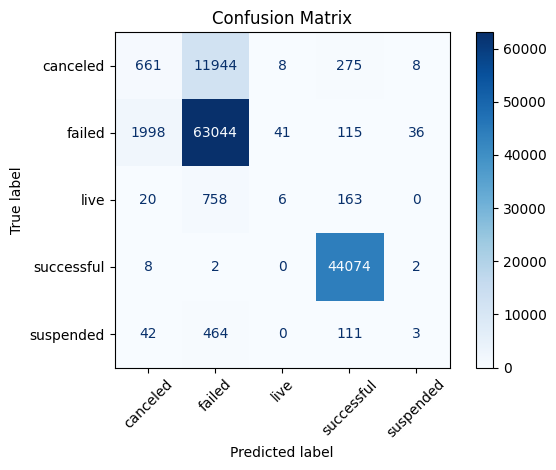

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_str = StateEncoder.inverse_transform(y_test)
y_pred_str = StateEncoder.inverse_transform(y_pred)

labels = StateEncoder.classes_

# Now compute confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=labels)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


#Save


In [ ]:
import joblib

# Save each LabelEncoder
joblib.dump(CategoryEncoder, '/content/drive/MyDrive/ML_Project/Datasets/KickStarter/CategoryEncoder.pkl')
joblib.dump(StateEncoder, '/content/drive/MyDrive/ML_Project/Datasets/KickStarter/StateEncoder.pkl')
joblib.dump(CurrencyEncoder, '/content/drive/MyDrive/ML_Project/Datasets/KickStarter/CurrencyEncoder.pkl')
joblib.dump(CountryEncoder, '/content/drive/MyDrive/ML_Project/Datasets/KickStarter/CountryEncoder.pkl')

# Save your trained model
# Example: If you trained a RandomForest, XGBoost, etc.
joblib.dump(model, '/content/drive/MyDrive/ML_Project/Datasets/KickStarter/trained_model.pkl')


['/content/drive/MyDrive/ML_Project/Datasets/KickStarter/trained_model.pkl']